### Lista de Execícios I -  Simulações Estocásticas

1. *Considerando os codigos do gerador congruente do xorshif
 t e mersenne twister disponibilizados no repositorio elabora uma comparação visual entre esses métodos.*


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import expon


a. *Gere n = 100 exemplos aleatórios de cada um deles.*

In [6]:
# Mersenne Twister (MT)
mt_numbers = [random.random() for _ in range(100)]


In [7]:
# Xorshift
class Xorshift:
    def __init__(self, seed):
        self.x = seed

    def next(self):
        # valores usados para um Xorshift de 32 bits
        self.x ^= self.x << 13
        self.x &= 0xFFFFFFFF  # Simula um overflow de 32 bits
        self.x ^= self.x >> 17
        self.x &= 0xFFFFFFFF  # Simula um overflow de 32 bits
        self.x ^= self.x << 5
        self.x &= 0xFFFFFFFF  # Simula um overflow de 32 bits
        return self.x

# Semente para o gerador Xorshift
seed = 123456789
xorshift_generator = Xorshift(seed)

# Gerar 100 números usando o Xorshift
xorshift_numbers = [xorshift_generator.next() for _ in range(100)]

# Normalizar os números Xorshift para o intervalo [0, 1]
xorshift_numbers = [x / 0xFFFFFFFF for x in xorshift_numbers]


In [8]:
print("Mersenne Twister numbers:", mt_numbers)
print("Xorshift numbers:", xorshift_numbers)

Mersenne Twister numbers: [0.10570103035096678, 0.8329244049099548, 0.6774505677075936, 0.10843423933008045, 0.46953994022156287, 0.32897406408802743, 0.6846567500895702, 0.09838582761027481, 0.012286807036095193, 0.46953425786898606, 0.771715862219144, 0.048852283492275106, 0.15903215080975774, 0.10656814459405195, 0.29326935119440334, 0.05624943912161906, 0.3664742847159519, 0.8892435173964947, 0.18514958539065973, 0.9514208116652152, 0.073151027006776, 0.09420144294011623, 0.581559643290058, 0.26945355153832995, 0.5704914833914051, 0.3826801619667173, 0.5855966832877996, 0.7461918906584342, 0.45458286466926423, 0.8021299512033478, 0.17816588759150054, 0.33830412591431025, 0.1593774397929857, 0.19489551473094457, 0.5023355154681131, 0.8405263519629934, 0.7258059341503125, 0.011094121427325021, 0.3587353788039749, 0.5413085206172666, 0.5269001431980278, 0.9039704252363374, 0.7647905599801502, 0.5786660723302065, 0.5503639021805201, 0.9653764521329482, 0.7405002123240485, 0.83227961247

b. *Faça um scatter plot onde x representa os valores gerados e y o valor anterior.*

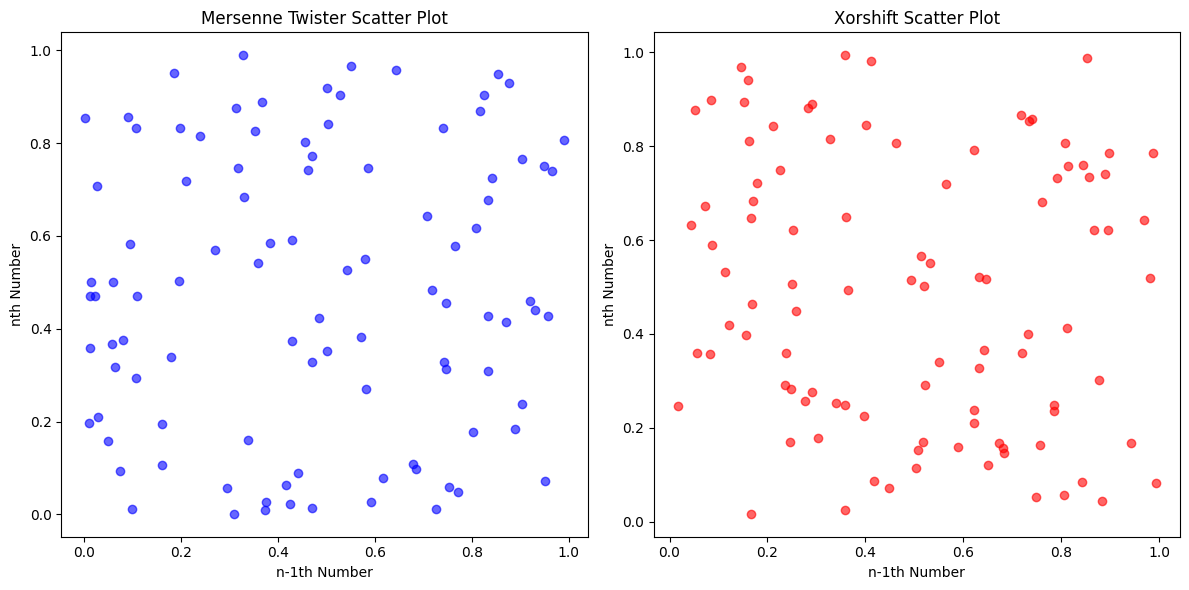

In [9]:
# Scatter plot para Mersenne Twister e Xorshift
plt.figure(figsize=(12, 6))

# Scatter plot para Mersenne Twister
plt.subplot(1, 2, 1)
plt.scatter(mt_numbers[:-1], mt_numbers[1:], color='blue', alpha=0.6)
plt.title('Mersenne Twister Scatter Plot')
plt.xlabel('n-1th Number')
plt.ylabel('nth Number')

# Scatter plot para Xorshift
plt.subplot(1, 2, 2)
plt.scatter(xorshift_numbers[:-1], xorshift_numbers[1:], color='red', alpha=0.6)
plt.title('Xorshift Scatter Plot')
plt.xlabel('n-1th Number')
plt.ylabel('nth Number')

plt.tight_layout()
plt.show()


c. *Calcule as distâncias entre os valores gerados e repita o scatter plot onde x sçao as distâncias e y a distância anterior.*

In [10]:
def calc_differences(numbers):
    return [abs(numbers[i+1] - numbers[i]) for i in range(len(numbers)-1)]

mt_diff = calc_differences(mt_numbers)
xor_diff = calc_differences(xorshift_numbers)

In [11]:
print(mt_diff)
print(xor_diff)

[0.727223374558988, 0.1554738372023612, 0.5690163283775131, 0.3611057008914824, 0.14056587613353544, 0.35568268600154274, 0.5862709224792954, 0.08609902057417962, 0.45724745083289087, 0.30218160435015795, 0.7228635787268689, 0.11017986731748264, 0.052464006215705794, 0.1867012066003514, 0.23701991207278428, 0.31022484559433283, 0.5227692326805428, 0.7040939320058349, 0.7662712262745555, 0.8782697846584392, 0.021050415933340227, 0.4873582003499418, 0.3121060917517281, 0.30103793185307515, 0.18781132142468782, 0.2029165213210823, 0.1605952073706346, 0.29160902598916993, 0.3475470865340836, 0.6239640636118473, 0.1601382383228097, 0.17892668612132456, 0.03551807493795889, 0.3074400007371685, 0.33819083649488035, 0.11472041781268094, 0.7147118127229874, 0.34764125737664986, 0.18257314181329176, 0.014408377419238838, 0.3770702820383096, 0.1391798652561872, 0.18612448764994372, 0.02830217014968639, 0.4150125499524281, 0.2248762398088997, 0.09177940014846775, 0.4045949333341671, 0.164369131165

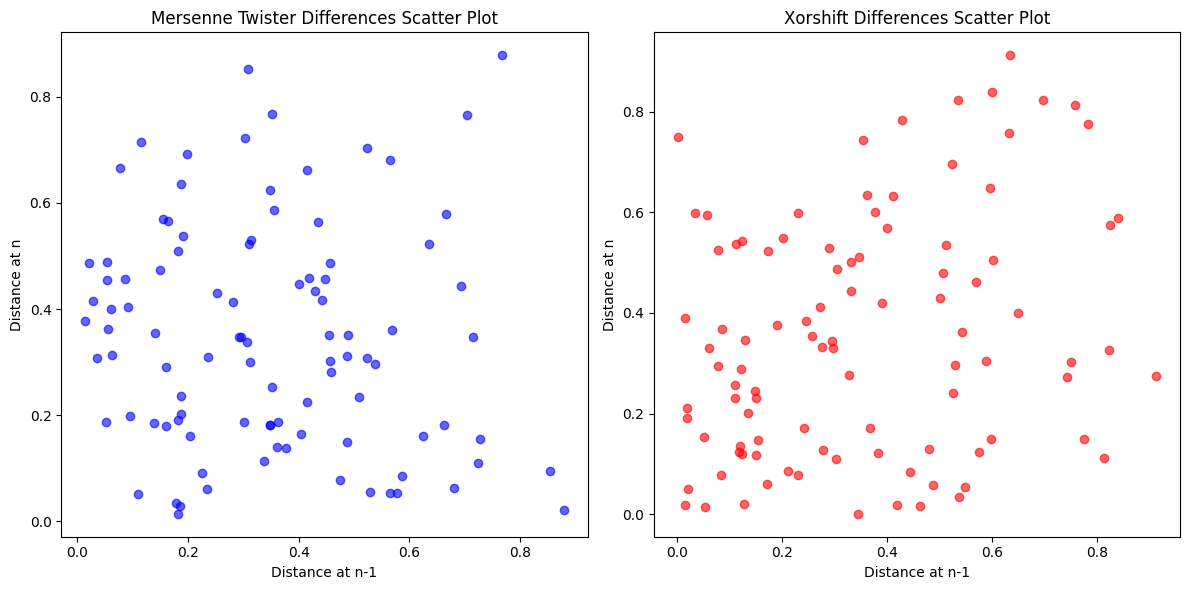

In [12]:
# Scatter plot das distâncias para Mersenne Twister e Xorshift
plt.figure(figsize=(12, 6))

# Scatter plot para Mersenne Twister
plt.subplot(1, 2, 1)
plt.scatter(mt_diff[:-1], mt_diff[1:], color='blue', alpha=0.6)
plt.title('Mersenne Twister Differences Scatter Plot')
plt.xlabel('Distance at n-1')
plt.ylabel('Distance at n')

# Scatter plot para Xorshift
plt.subplot(1, 2, 2)
plt.scatter(xor_diff[:-1], xor_diff[1:], color='red', alpha=0.6)
plt.title('Xorshift Differences Scatter Plot')
plt.xlabel('Distance at n-1')
plt.ylabel('Distance at n')

plt.tight_layout()
plt.show()


2. *Um interesse fundamental sobre os geradores de números aleatórios é estabelecer medidas de variabilidade das sequências geradas.*

a. *Elabore um método de geração de números aleatórios linear congruente para números de 8 bits (0 a 255).*

In [13]:
class LCG:
    def __init__(self, seed):
        self.a = 1103515245  # Um valor comum para 'a'
        self.c = 12345       # Um valor comum para 'c'
        self.m = 256         # Módulo para gerar números de 8 bits
        self.x = seed        # Semente inicial

    def next(self):
        self.x = (self.a * self.x + self.c) % self.m
        return self.x

seed = 42
lcg_generator = LCG(seed)

lcg_numbers = [lcg_generator.next() for _ in range(100)]

b. *Verifique o período, amplitude e variância do método proposto para a geração de 50, 100, 200, 300 valores.*

In [14]:
def analyze_lcg(sample_sizes):
    for size in sample_sizes:
        lcg_numbers = [lcg_generator.next() for _ in range(size)]

        # Verificação do período
        period = len(set(lcg_numbers))

        # Amplitude
        amplitude = max(lcg_numbers) - min(lcg_numbers)

        # Variância
        variance = np.var(lcg_numbers)

        print(f"Amostra de tamanho {size}: Período = {period}, Amplitude = {amplitude}, Variância = {variance:.2f}")


sample_sizes = [50, 100, 200, 300]

analyze_lcg(sample_sizes)

Amostra de tamanho 50: Período = 50, Amplitude = 248, Variância = 4545.06
Amostra de tamanho 100: Período = 100, Amplitude = 251, Variância = 5309.83
Amostra de tamanho 200: Período = 200, Amplitude = 255, Variância = 5369.28
Amostra de tamanho 300: Período = 256, Amplitude = 255, Variância = 5537.57


c. *Verifique o período, amplitude e variância das distâncias entre os valores gerados pelo método.*

In [15]:
def analyze_lcg_distances(sample_sizes):
    for size in sample_sizes:
        # Reset the LCG generator for each sample size
        lcg_generator = LCG(seed)

        lcg_numbers = [lcg_generator.next() for _ in range(size)]

        # Calcular distâncias
        distances = [abs(lcg_numbers[i+1] - lcg_numbers[i]) for i in range(size-1)]

        # Verificar o período das distâncias
        period = len(set(distances))

        # Amplitude das distâncias
        amplitude = max(distances) - min(distances)

        # Variância das distâncias
        variance = np.var(distances)

        print(f"Amostra de tamanho {size}:")
        print(f"Distâncias - Período = {period}, Amplitude = {amplitude}, Variância = {variance:.2f}")

sample_sizes = [50, 100, 200, 300]

analyze_lcg_distances(sample_sizes)


Amostra de tamanho 50:
Distâncias - Período = 49, Amplitude = 230, Variância = 4087.80
Amostra de tamanho 100:
Distâncias - Período = 77, Amplitude = 230, Variância = 3944.01
Amostra de tamanho 200:
Distâncias - Período = 100, Amplitude = 230, Variância = 3472.71
Amostra de tamanho 300:
Distâncias - Período = 111, Amplitude = 232, Variância = 3657.45


d. *Utilize um gerador acoplado na linguagem de programação patra fazer os mesmos testes. Como eles se comparam com o gerador proposto?*

In [16]:
# Função para análise das sequências de números
def analyze_sequence(numbers):
    period = len(set(numbers))
    amplitude = max(numbers) - min(numbers)
    variance = np.var(numbers)
    return period, amplitude, variance

# Função para gerar números com o LCG e calcular propriedades
def test_lcg(rng, sample_sizes):
    for size in sample_sizes:
        numbers = [rng.next() for _ in range(size)]
        period, amplitude, variance = analyze_sequence(numbers)
        print(f"LCG - Amostra de tamanho {size}: Período = {period}, Amplitude = {amplitude}, Variância = {variance:.2f}")

# Inicializar o gerador LCG com uma semente
seed = 42
lcg = LCG(seed)

# Tamanhos de amostras para teste
sample_sizes = [50, 100, 200, 300]

# Testar o LCG
test_lcg(lcg, sample_sizes)

LCG - Amostra de tamanho 50: Período = 50, Amplitude = 252, Variância = 5994.72
LCG - Amostra de tamanho 100: Período = 100, Amplitude = 251, Variância = 4946.25
LCG - Amostra de tamanho 200: Período = 200, Amplitude = 255, Variância = 5615.33
LCG - Amostra de tamanho 300: Período = 256, Amplitude = 255, Variância = 5423.46


In [17]:
def test_builtin_rng(sample_sizes):
    for size in sample_sizes:
        numbers = [random.randint(0, 255) for _ in range(size)]
        period, amplitude, variance = analyze_sequence(numbers)
        print(f"Gerador Nativo - Amostra de tamanho {size}: Período = {period}, Amplitude = {amplitude}, Variância = {variance:.2f}")

# Testar o gerador nativo
test_builtin_rng(sample_sizes)

Gerador Nativo - Amostra de tamanho 50: Período = 46, Amplitude = 236, Variância = 4477.52
Gerador Nativo - Amostra de tamanho 100: Período = 73, Amplitude = 249, Variância = 5189.29
Gerador Nativo - Amostra de tamanho 200: Período = 138, Amplitude = 249, Variância = 4919.56
Gerador Nativo - Amostra de tamanho 300: Período = 177, Amplitude = 255, Variância = 5369.84


3. *Elabore um gerador para variáveis binomiais com parâmetro n e p que utilize a geração de variáveis geométricas com parâmetro p, utilizando-se do fato que ambas estão relacionadas à sequências de Bernoulli. Elabore experimentos variando os valores de n e p, medindo quantos valores aleatórios são necessários para ageração de uma variável Binomial.*

In [18]:
def generate_geometric(p):
    """Gerar uma variável geométrica com parâmetro p."""
    count = 0
    while np.random.rand() >= p:
        count += 1
    return count + 1  # +1 para contar o sucesso

In [19]:
def generate_binomial(n, p):
    """Gerar uma variável binomial usando variáveis geométricas."""
    return sum(generate_geometric(p) for _ in range(n))

In [20]:
def experiment(n, p, num_trials=1000):
    """Realizar experimento para calcular a quantidade média de variáveis aleatórias necessárias."""
    total_random_variables = 0
    for _ in range(num_trials):
        total_random_variables += generate_binomial(n, p)
    return total_random_variables / num_trials

In [21]:
# Valores de n e p para o experimento
n_values = [10, 20, 50]
p_values = [0.1, 0.5, 0.9]


In [22]:

experiment_results = {(n, p): experiment(n, p) for n in n_values for p in p_values}

4. *Uma seleção aleatória de m bolas deve ser feita de uma urna que contém n bolas, ni das quais tem a cor i de forma que (fórmula). Como podemos simular de forma eficiente as variáveis aleatórias x1, ..., xr onde xi denota o número de bolas retiradas da cor i.*

In [29]:
def simulate_urn_draws(n, m, color_counts):
    """
    Simula a retirada de bolas de uma urna que contém n bolas,
    com color_counts[i] bolas da cor i, até m bolas serem retiradas.

    Parâmetros:
    n (int): número total de bolas na urna.
    m (int): número total de bolas a serem retiradas.
    color_counts (list): lista onde o elemento i representa o número de bolas da cor i.

    Retorna:
    list: uma lista de variáveis aleatórias X1, ..., Xm onde Xi é o número de bolas da cor i retiradas.
    """
    urn = np.array(sum(([i] * count for i, count in enumerate(color_counts)), []))
    np.random.shuffle(urn)
    draws = np.random.choice(urn, size=m, replace=False)
    return [np.sum(draws == i) for i in range(len(color_counts))]

In [30]:
n = 100  # Total de bolas
m = 10   # Bolas para retirar
color_counts = [30, 20, 50]  # Bolas de cada cor

In [31]:
urn_simulation = simulate_urn_draws(n, m, color_counts)

In [33]:
urn_simulation

[3, 3, 4]

5. A distribuição de Cauchy com parâmetro α tem a seguinte função de densidade



Elabore um método de geração de variáveis de Cauchy para um parâmetro α fixo.

In [34]:
def generate_cauchy(alpha, size=1):
    """
    Gera variáveis aleatórias com distribuição de Cauchy com parâmetro α.

    Parâmetros:
    alpha (float): parâmetro α da distribuição de Cauchy.
    size (int): número de variáveis a serem geradas.

    Retorna:
    np.ndarray: um array de variáveis de Cauchy geradas.
    """
    uniform_vars = np.random.uniform(-np.pi/2, np.pi/2, size)
    cauchy_vars = alpha * np.tan(uniform_vars)
    return cauchy_vars

In [35]:
alpha = 1
cauchy_var = generate_cauchy(alpha)